In [1]:
import os
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# need ops from TensorFlow, import it like this:
from tensorflow.python.ops import math_ops  # can adjust the path based on  TensorFlow version

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


C:\Users\nehag\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\nehag\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [3]:
import os
import cv2
import numpy as np
import re

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                # Extract the label from the filename using a regular expression
                match = re.search(r'\d{4}-\d{2}-\d{2}', filename)
                if match:
                    label = match.group(0)
                    labels.append(label)
    return np.array(images), np.array(labels)

dataset_folder = 'images'

x_train, y_train = load_images_from_folder(dataset_folder)

# Print the size of the loaded data
print("Size of X_train:", len(x_train))
print("Size of y_train:", len(y_train))

Size of X_train: 744
Size of y_train: 744


C:\Users\nehag\AppData\Local\Temp\ipykernel_3824\3386135084.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [4]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
 
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    return image

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert date labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)

# Print the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train_encoded.shape)
print("Shape of y_test:", y_test_encoded.shape)


Shape of X_train: (595,)
Shape of X_test: (149,)
Shape of y_train: (595,)
Shape of y_test: (149,)


In [6]:
import numpy as np

# Print the size and shape of X_train
print("Size of X_train:", X_train.shape)

# Print the unique labels in y_train
print("Unique labels in y_train:", np.unique(y_train))

# Print the number of unique labels in y_train
print("Number of unique labels in y_train:", len(np.unique(y_train)))


Size of X_train: (595,)
Unique labels in y_train: ['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31']
Number of unique labels in y_train: 31


In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert date strings to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_encoded)

# Print the unique encoded labels in y_train
print("Unique encoded labels in y_train:", np.unique(y_train_encoded))

# Print the number of unique encoded labels in y_train
print("Number of unique encoded labels in y_train:", len(np.unique(y_train_encoded)))


Unique encoded labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Number of unique encoded labels in y_train: 31


In [8]:
import cv2

# Resize images to (224, 224, 3)
X_train_resized = [cv2.resize(img, (224, 224)) for img in X_train]

# Convert the list to a NumPy array
X_train_resized = np.array(X_train_resized)

# Verify the new shape
print("New shape of X_train:", X_train_resized.shape)


New shape of X_train: (595, 224, 224, 3)


In [9]:
import cv2

# Resize images to (224, 224, 3)
X_test_resized = [cv2.resize(img, (224, 224)) for img in X_test]

# Convert the list to a NumPy array
X_test_resized = np.array(X_test_resized)

# Verify the new shape
print("New shape of X_train:", X_test_resized.shape)


New shape of X_train: (149, 224, 224, 3)


In [10]:
print(f"x_train shape: {X_train_resized.shape} - y_train shape: {y_train_encoded.shape}")
print(f"x_test shape: {X_test_resized.shape} - y_test shape: {y_test_encoded.shape}")

x_train shape: (595, 224, 224, 3) - y_train shape: (595,)
x_test shape: (149, 224, 224, 3) - y_test shape: (149,)


In [11]:
import numpy as np
import pandas as pd

# Assuming you have an array of image IDs
image_ids = y_train_encoded

# Reshape the 4D array into a 2D array
reshaped_array = X_train_resized.reshape(X_train_resized.shape[0], -1)

# Create a DataFrame with the reshaped array
df = pd.DataFrame(reshaped_array, columns=[f'pixel_{i}' for i in range(reshaped_array.shape[1])])

# Add image IDs to the DataFrame
df['image_id'] = image_ids

In [12]:
x_train=X_train_resized
x_test=X_test_resized
y_train=y_train_encoded
y_test=y_test_encoded

In [13]:
import keras
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

# Implementation of the AlexNet architecture

In [14]:
model = Sequential()
  
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (224, 224, 3), 
            kernel_size = (11, 11), strides = (4, 4), 
            padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (3, 3),
            strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (5, 5), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Flattening
model.add(Flatten())
  
# 1st Dense Layer
model.add(Dense(4096, input_shape = (227*227*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())
  
# Output Softmax Layer
model.add(Dense(31))
model.add(Activation('softmax'))

In [15]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)       0

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(595, 224, 224, 3)
(149, 224, 224, 3)
(595,)
(149,)


In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rlp = ReduceLROnPlateau(factor=0.5, patience=3)  # Adjust parameters as needed

history = model.fit(
    x_train, y_train,
    epochs=15,
    callbacks=[rlp],
    validation_split=0.10
)

Epoch 1/15
17/17 [==============================] - 33s 2s/step - loss: 3.6700 - accuracy: 0.1252 - val_loss: 1642.8438 - val_accuracy: 0.0333 - lr: 0.0010
Epoch 2/15
17/17 [==============================] - 30s 2s/step - loss: 2.0523 - accuracy: 0.3963 - val_loss: 2340.1904 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 3/15
17/17 [==============================] - 29s 2s/step - loss: 1.4915 - accuracy: 0.5626 - val_loss: 2814.7026 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 4/15
17/17 [==============================] - 30s 2s/step - loss: 1.2242 - accuracy: 0.6243 - val_loss: 2210.3086 - val_accuracy: 0.0500 - lr: 0.0010
Epoch 5/15
17/17 [==============================] - 30s 2s/step - loss: 1.1578 - accuracy: 0.6318 - val_loss: 1507.5922 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 6/15
17/17 [==============================] - 30s 2s/step - loss: 0.7503 - accuracy: 0.7458 - val_loss: 942.3228 - val_accuracy: 0.0500 - lr: 5.0000e-04
Epoch 7/15
17/17 [==============================] - 31s 2

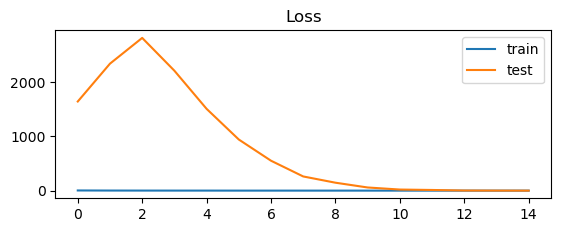

In [18]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss']
         , label='test')
plt.legend()

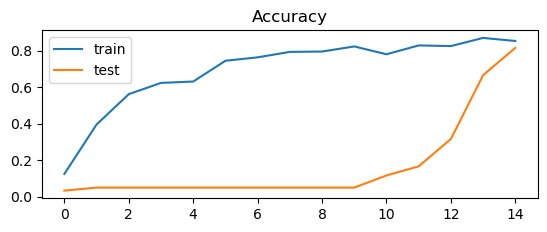

In [19]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [20]:
x_test.shape

(149, 224, 224, 3)

In [21]:
y_test.shape

(149,)

In [22]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have your model defined, data loaded (x_test, y_test), and model trained

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to class indices if needed
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)


5/5 [==============================] - 2s 386ms/step - loss: 0.3943 - accuracy: 0.8523
Test Loss: 0.3943
Test Accuracy: 0.8523
5/5 [==============================] - 3s 378ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         8
           3       0.82      1.00      0.90         9
           4       0.80      1.00      0.89         4
           5       1.00      0.67      0.80         3
           6       1.00      0.60      0.75         5
           7       0.40      1.00      0.57         2
           8       1.00      0.62      0.77         8
           9       0.67      1.00      0.80         4
          10       0.86      1.00      0.92         6
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         5
          13       1.00      0.71      0

C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming you have your model defined, data loaded (x_test, y_test), and model trained

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to class indices if needed
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Extract precision, recall, and F1-score from the classification report
precision = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['f1-score']

# Calculate accuracy and sensibility
accuracy = np.sum(y_true == y_pred) / len(y_true)
sensibility = recall  # Sensibility is the same as recall in binary classification

# Print accuracy, sensibility, precision, recall, and F1-score
print(f'Accuracy: {accuracy:.4f}')
print(f'Sensibility: {sensibility:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

5/5 [==============================] - 2s 377ms/step - loss: 0.3943 - accuracy: 0.8523
Test Loss: 0.3943
Test Accuracy: 0.8523
5/5 [==============================] - 2s 388ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         8
           3       0.82      1.00      0.90         9
           4       0.80      1.00      0.89         4
           5       1.00      0.67      0.80         3
           6       1.00      0.60      0.75         5
           7       0.40      1.00      0.57         2
           8       1.00      0.62      0.77         8
           9       0.67      1.00      0.80         4
          10       0.86      1.00      0.92         6
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         5
          13       1.00      0.71      0

C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nehag\anaconda3\lib\site-packages\sklearn\metr

# InceptionV3 models

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(595, 224, 224, 3)
(149, 224, 224, 3)
(595,)
(149,)


In [34]:
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import SGD

# Load the InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Flatten(name='flatten')(x) # Rename the flatten layer with input shape specified
predictions = Dense(31, activation='softmax')(x)

# Define the new model
inceptionv3_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a learning rate and optimizer
opt = SGD(lr=0.001, momentum=0.9)
# Train the model with specified number of epochs, batch size, and validation split
#epochs = 15
batch_size = 32
validation_split = 0.2
start_time = time.time()
inceptionv3_history = inceptionv3_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)       0

In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rlp = ReduceLROnPlateau(factor=0.5, patience=3)  # Adjust parameters as needed

history = model.fit(
    x_train, y_train,
    epochs=15,
    callbacks=[rlp],
    validation_split=0.10
)

Epoch 1/15
17/17 [==============================] - 29s 2s/step - loss: 0.5461 - accuracy: 0.8486 - val_loss: 0.9378 - val_accuracy: 0.7833 - lr: 5.0000e-04
Epoch 2/15
17/17 [==============================] - 31s 2s/step - loss: 0.4203 - accuracy: 0.8636 - val_loss: 0.7117 - val_accuracy: 0.8000 - lr: 5.0000e-04
Epoch 3/15
17/17 [==============================] - 29s 2s/step - loss: 0.5011 - accuracy: 0.8411 - val_loss: 3.4740 - val_accuracy: 0.4167 - lr: 5.0000e-04
Epoch 4/15
17/17 [==============================] - 29s 2s/step - loss: 0.4471 - accuracy: 0.8467 - val_loss: 10.7585 - val_accuracy: 0.1667 - lr: 5.0000e-04
Epoch 5/15
17/17 [==============================] - 29s 2s/step - loss: 0.4967 - accuracy: 0.8336 - val_loss: 20.0754 - val_accuracy: 0.1167 - lr: 5.0000e-04
Epoch 6/15
17/17 [==============================] - 29s 2s/step - loss: 0.4214 - accuracy: 0.8598 - val_loss: 11.9999 - val_accuracy: 0.1500 - lr: 2.5000e-04
Epoch 7/15
17/17 [==============================] - 31s

In [36]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Assuming you have your model defined, data loaded (x_test, y_test), and model trained

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to class indices if needed
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Extract precision, recall, and F1-score from the classification report
precision = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_true, y_pred, output_dict=True)['weighted avg']['f1-score']

# Calculate accuracy and sensibility
accuracy = accuracy_score(y_true, y_pred)
sensibility = recall  # Sensibility is the same as recall in binary classification

# Print accuracy, sensibility, precision, recall, and F1-score
print(f'Accuracy: {accuracy:.4f}')
print(f'Sensibility: {sensibility:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

5/5 [==============================] - 2s 396ms/step - loss: 0.3288 - accuracy: 0.9060
Test Loss: 0.3288
Test Accuracy: 0.9060
5/5 [==============================] - 2s 388ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5
           2       0.89      1.00      0.94         8
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         2
           8       1.00      0.75      0.86         8
           9       0.67      1.00      0.80         4
          10       0.86      1.00      0.92         6
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         5
          13       1.00      0.86      0